In [1]:
import numpy as np
import os

import pandas as pd
from keras import Sequential
from keras.src.applications import VGG19
from keras.src.callbacks import ModelCheckpoint
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.src.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing import image
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras.models import load_model

In [4]:
root = "./img"

train_catalog = "./img/train"
validation_catalog = "./img/validation"
test_catalog = "./img/test"

train_catalogs = [train_catalog + e for e in ["/bicycle", "/car", "/ship", "/tank"]]
validation_catalogs = [validation_catalog + e for e in ["/bicycle", "/car", "/ship", "/tank"]]
test_catalogs = [test_catalog + e for e in ["/bicycle", "/car", "/ship", "/tank"]]



In [3]:
train_images = 0
validation_images = 0
test_images = 0

for e in train_catalogs:
    temp = len(os.listdir(e))
    print(f"{e} images: {temp}")
    train_images += temp

print(f"Train set size: {train_images}\n")

for e in validation_catalogs:
    temp = len(os.listdir(e))
    print(f"{e} images: {temp}")
    validation_images += temp

print(f"Validation set size: {validation_images}\n")

for e in test_catalogs:
    temp = len(os.listdir(e))
    print(f"{e} images: {temp}")
    test_images += temp

print(f"Test set size: {test_images}\n")

./img/train/bicycle images: 150
./img/train/car images: 150
./img/train/ship images: 150
./img/train/tank images: 150
Train set size: 600

./img/validation/bicycle images: 40
./img/validation/car images: 40
./img/validation/ship images: 40
./img/validation/tank images: 40
Validation set size: 160

./img/test/bicycle images: 31
./img/test/car images: 28
./img/test/ship images: 36
./img/test/tank images: 35
Test set size: 130


In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255.,
                                   horizontal_flip=True,
                                   brightness_range=[0.4, 1.4],
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.1,
                                   rotation_range=30,
                                   fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1. / 255.)

train_generator = train_datagen.flow_from_directory(directory=train_catalog,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode="categorical")

validation_generator = train_datagen.flow_from_directory(directory=validation_catalog,
                                                         target_size=(150, 150),
                                                         batch_size=32,
                                                         class_mode="categorical")

train_filenames = train_generator.filepaths
validation_filenames = validation_generator.filepaths

Found 600 images belonging to 4 classes.
Found 160 images belonging to 4 classes.


In [5]:
def show_augmented_image(id):
    img = image.load_img(train_filenames[id], target_size=(150, 150))
    img = image.img_to_array(img)
    img = img.reshape((1,) + img.shape)

    rows, cols = 3, 3
    fig = make_subplots(rows=rows, cols=cols)

    i = 0
    for batch in train_datagen.flow(img, batch_size=1):

        img = image.array_to_img(batch[0])

        fig.add_trace(go.Image(z=img), row=i // cols + 1, col=i % cols + 1)

        i += 1
        if i >= rows * cols:
            break

    fig.update_layout(width=1000, height=800, grid={"rows": rows, "columns": cols},
                      margin={"l": 0, "r": 0, "t": 0, "b": 0})

    fig.show()

# show_augmented_image(556)

In [2]:
model = load_model("model5.keras")

# model = Sequential()
# model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(150, 150, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))


# base = VGG19(weights="imagenet", input_shape=(150, 150, 3), include_top=False)
# model.add(base)


# model.add(Flatten())
# model.add(Dense(units=256, activation="relu"))
# model.add(Dense(units=128, activation="relu"))
# model.add(Dense(units=128, activation="relu"))
# model.add(Dense(units=4, activation="softmax"))
# base.trainable = False

model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               2097408   
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 4)                 516       
                                                                 
Total params: 22171716 (84.58 MB)
Trainable params: 21

In [61]:
mc = ModelCheckpoint(filepath="model5.keras", monitor="val_accuracy", mode="max", save_best_only=True)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[mc])

model.save("model_after_training.keras")

Epoch 1/20
19/19 [==============================] - 108s 6s/step - loss: 1.0855 - accuracy: 0.5300 - val_loss: 0.9438 - val_accuracy: 0.6062
Epoch 2/20
19/19 [==============================] - 106s 6s/step - loss: 0.7055 - accuracy: 0.7383 - val_loss: 0.8037 - val_accuracy: 0.6625
Epoch 3/20
19/19 [==============================] - 107s 6s/step - loss: 0.4577 - accuracy: 0.8367 - val_loss: 0.6612 - val_accuracy: 0.7812
Epoch 4/20
19/19 [==============================] - 106s 6s/step - loss: 0.4400 - accuracy: 0.8350 - val_loss: 0.8483 - val_accuracy: 0.7688
Epoch 5/20
19/19 [==============================] - 107s 6s/step - loss: 0.3774 - accuracy: 0.8733 - val_loss: 0.7456 - val_accuracy: 0.7563
Epoch 6/20
19/19 [==============================] - 106s 6s/step - loss: 0.3235 - accuracy: 0.8783 - val_loss: 0.6335 - val_accuracy: 0.7812
Epoch 7/20
19/19 [==============================] - 107s 6s/step - loss: 0.2876 - accuracy: 0.8983 - val_loss: 0.6336 - val_accuracy: 0.7750
Epoch 8/20
19

In [129]:
def draw_history(history):
    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(x=history.epoch, y=history.history["accuracy"], name="accuracy"))
    fig1.add_trace(go.Scatter(x=history.epoch, y=history.history["val_accuracy"], name="val_accuracy"))
    fig1.show()

    fig1 = go.Figure()
    fig1.add_trace(go.Scatter(x=history.epoch, y=history.history["loss"], name="loss"))
    fig1.add_trace(go.Scatter(x=history.epoch, y=history.history["val_loss"], name="val_loss"))
    fig1.show()


draw_history(history)

In [14]:
test_datagen = ImageDataGenerator(rescale=1. / 255.)
test_generator = test_datagen.flow_from_directory(directory=test_catalog,
                                                  target_size=(150, 150),
                                                  batch_size=1,
                                                  class_mode="categorical",
                                                  shuffle=False)

model.load_weights("model_after_training.keras")
# model.load_weights("model5.keras")

probs = model.predict(test_generator)

df = pd.DataFrame({"filepath": test_generator.filepaths,
                   "class": test_generator.classes,
                   "predict": np.argmax(probs, axis=1)})
df

Found 130 images belonging to 4 classes.
 40/130 [========>.....................] - ETA: 29s

C:\Users\Ilvondir\Desktop\neural-networks\venv\lib\site-packages\PIL\Image.py:981: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



130/130 [==============================] - 42s 319ms/step


,filepath,class,predict
0,./img/test\bicycle\cyclephoto21.jpeg,0,0
1,./img/test\bicycle\cyclephoto22.jpeg,0,0
2,./img/test\bicycle\cyclephoto23.png,0,1
3,./img/test\bicycle\cyclephoto24.jpeg,0,0
4,./img/test\bicycle\cyclephoto25.jpeg,0,0
...,...,...,...
125,./img/test\tank\tankphoto245.jpeg,3,3
126,./img/test\tank\tankphoto246.jpeg,3,3
127,./img/test\tank\tankphoto247.jpeg,3,3
128,./img/test\tank\tankphoto248.jpeg,3,3


In [15]:
print(f"Accuracy: {accuracy_score(df['class'], df['predict'])}")

print(test_generator.class_indices)
cm = confusion_matrix(df["class"], df["predict"])
px.imshow(cm, text_auto=True, x=["p_bicycle", "p_car", "p_ship", "p_tank"],
          y=["t_bicycle", "t_car", "t_ship", "t_tank"], title="Confussion Matrix")

Accuracy: 0.8692307692307693
{'bicycle': 0, 'car': 1, 'ship': 2, 'tank': 3}


[2, 44, 47, 52, 56, 66, 69, 79, 83, 93, 95, 97, 99, 112, 115, 117, 123]
This is ship photo- predicted tank
./img/test\ship\shipphoto237.jpeg


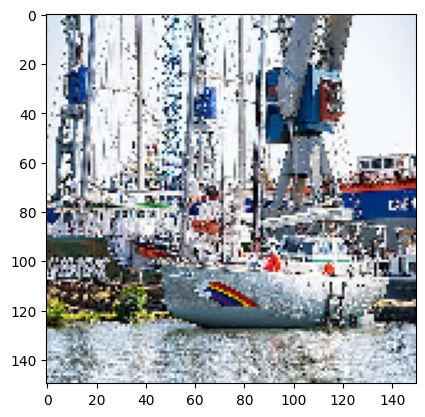

In [18]:
print(df.index[df["class"] != df["predict"]].tolist())

classes = list(test_generator.class_indices.keys())


def show_image(id):
    img = image.load_img(test_generator.filepaths[id], target_size=[150, 150])
    plt.imshow(img)
    print(f"This is {classes[df['class'][id]]} photo- predicted {classes[df['predict'][id]]}")
    print(df["filepath"][id])


show_image(83)
